## Linear Model

$$
\hat{y} = w_0 + w_1 x_1 + w_2 x_2
$$

Linear Model minimizes

$$
\sum \big(y-\hat{y} \big)^2.
$$

## LASSO: 

LASSO minimizes

$$
\sum \bigg(y-\hat{y} \bigg)^2 +  \alpha \bigg( |w_1|+|w_2| \bigg).
$$

## The effect of alpha in LASSO

LASSO has hyperparameter $\alpha$.  A large $\alpha$ shrinks the coefficients to zeros quicklier.

In the following codes, change the value of $\alpha$ to see the change of the slope of the two models. 

In [1]:
def elastic_plot(alpha=10, legend=True):

    import numpy as np
    import matplotlib.pyplot as plt
    from sklearn.linear_model import LinearRegression
    from sklearn import linear_model
    np.random.seed(0)

    # Create a dataset
    x = 30 * np.random.random((20, 1))
    
    y = 0.5 * x + 1.0 + np.random.normal(size=x.shape)

    # create a linear regression model
    model = LinearRegression()
    model.fit(x, y)

    # predict y from the data
    x_new = np.linspace(0, 30, 100)
    y_new = model.predict(x_new[:, np.newaxis])

    ######## LASSO
    model1 = linear_model.Lasso(alpha=alpha)
    model1.fit(x, y)
    # predict y from the data
    y_new1 = model1.predict(x_new[:, np.newaxis])

    # plot the results
    plt.figure(figsize=(8, 6))
    ax = plt.axes()
    ax.scatter(x, y)
    ax.plot(x_new, y_new)
    ax.plot(x_new, y_new1)
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.axis('tight')

    s1 = np.round(model.coef_[0][0], 3)
    s2 = np.round(model1.coef_[0], 3)

    if(legend):
        plt.legend(['Linear Model. Slope =' + str(s1), 'LASSO Model. Slope ='+ str(s2)], loc='upper left')

    plt.show()
    
    from tabulate import tabulate
    import pandas as pd

    d = np.concatenate((x,y), axis=1)
    d = pd.DataFrame(d, columns= ['x','y'])
    print('DATA:')
    print(tabulate(d, headers=['x','y'], tablefmt="fancy_grid"))

    


def elastic(size=100, coef=[1, 5, 10, 7, 9], alpha=1):
    import numpy as np
    from sklearn.linear_model import LinearRegression
    from sklearn import linear_model
    
    dim = [size, len(coef)]
    np.random.seed(0)
    x = np.random.random(dim)
    
    y = x.dot(coef) + np.random.normal(0, 1, size)
    
    
    # create a linear regression model
    model = LinearRegression()
    model.fit(x, y)



    ######## LASSO
    model1 = linear_model.Lasso(alpha=alpha)
    model1.fit(x, y)

    from tabulate import tabulate
    s1 = model.coef_
    s2 = model1.coef_
    s3 = model2.coef_
    s = np.vstack((coef, s1, s3, s2))
    import pandas as pd
    s = pd.DataFrame(s, index=["Truth",'Linear Model','LASSO'])
    headers = ['w' + str(i) for i in range(1,len(coef)+1)]

    print(tabulate(s, headers=headers, tablefmt="fancy_grid"))
    
#    return s


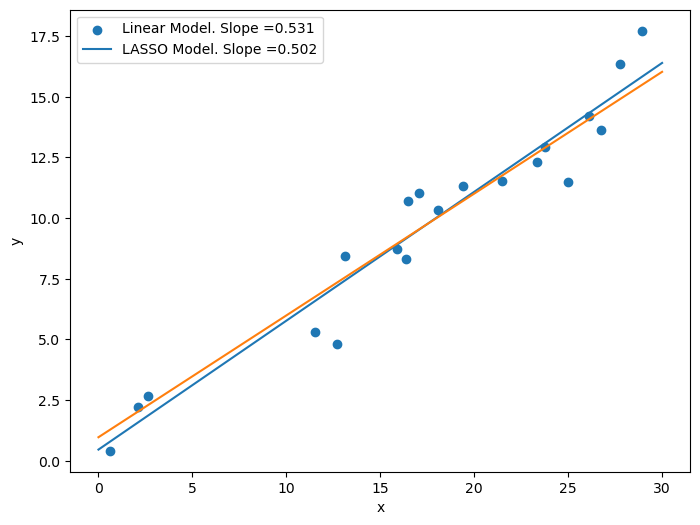

DATA:
╒════╤═══════════╤══════════╕
│    │         x │        y │
╞════╪═══════════╪══════════╡
│  0 │ 16.4644   │ 10.7263  │
├────┼───────────┼──────────┤
│  1 │ 21.4557   │ 11.5227  │
├────┼───────────┼──────────┤
│  2 │ 18.0829   │ 10.3545  │
├────┼───────────┼──────────┤
│  3 │ 16.3465   │  8.31915 │
├────┼───────────┼──────────┤
│  4 │ 12.7096   │  4.80183 │
├────┼───────────┼──────────┤
│  5 │ 19.3768   │ 11.342   │
├────┼───────────┼──────────┤
│  6 │ 13.1276   │  8.42824 │
├────┼───────────┼──────────┤
│  7 │ 26.7532   │ 13.6344  │
├────┼───────────┼──────────┤
│  8 │ 28.9099   │ 17.7247  │
├────┼───────────┼──────────┤
│  9 │ 11.5032   │  5.29726 │
├────┼───────────┼──────────┤
│ 10 │ 23.7518   │ 12.9216  │
├────┼───────────┼──────────┤
│ 11 │ 15.8668   │  8.74624 │
├────┼───────────┼──────────┤
│ 12 │ 17.0413   │ 11.0534  │
├────┼───────────┼──────────┤
│ 13 │ 27.7679   │ 16.3533  │
├────┼───────────┼──────────┤
│ 14 │  2.13108  │  2.22049 │
├────┼───────────┼──────────┤
│ 15

In [2]:
elastic_plot(alpha=2, legend=True)

# ElasticNet

Model: 

$$
\hat{y} = w_0 + w_1 x_1 + w_2 x_2
$$

ElasticNet is a combination of LASSO and Ridge, minimizing

$$
\sum \bigg(y-\hat{y} \bigg)^2 + \alpha (1-l_1) \bigg( w_1^2+w_2^2 \bigg) + \alpha l_1 \bigg( |w_1|+|w_2| \bigg),
$$
  
  - If $l_1 = 1$: We have LASSO
  - If $l_1 = 0$: We have Ridge
  - If $\alpha =0 $, we have a linear model. 

In [3]:
#elastic(alpha=.05, coef=[0, 0, 4, 3, 0, 1, 0, 3, 0 , 6, 0, 0, 0, 5, 1])
elastic(alpha=.05, coef=[0, 4, 0, 3, 0, 7])

NameError: name 'model2' is not defined

## 2. Predicting Boston Housing Price

We predict housing prices in Boston using linear model, ElasticNet and Random Forest. 

In [ ]:
import matplotlib.pyplot as plt
import numpy as np 
import pandas as pd
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression


boston=load_boston()
boston_df=pd.DataFrame(boston.data,columns=boston.feature_names)

#print boston_df.info()
# add another column that contains the house prices which in scikit learn datasets are considered as target
boston_df['Price']=boston.target

#print boston_df.head(3)
newX=boston_df.drop('Price',axis=1)
newY=boston_df['Price']
#print type(newY)# pandas core frame
X_train,X_test,y_train,y_test=train_test_split(newX,newY,test_size=0.9,random_state=27)

### Data Description

In [ ]:
print(boston.DESCR)

#### Linear Model

**On Original Data**

In [ ]:
newX=boston_df.drop('Price',axis=1)
newY=boston_df['Price']

#print type(newY)# pandas core frame
X_train,X_test,y_train,y_test=train_test_split(newX,newY,test_size=0.9,random_state=27)

from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

model = LinearRegression()
model.fit(X_train, y_train)

coef1 = pd.DataFrame({'Variable':X_train.columns, 
                     'Coef':model.coef_,
                      'Model': 'Linear',
                      'Data': 'Original'
                    })


print('R2 of Linear Model:',r2_score(y_test, model.predict(X_test)))

from sklearn.linear_model import ElasticNet
model = ElasticNet(l1_ratio=1, alpha=1.216)
model.fit(X_train, y_train)

coef2 = pd.DataFrame({'Variable':X_train.columns, 
                     'Coef':model.coef_,
                      'Model':'LASSO',
                      'Data': 'Original'
                    })

print('R2 of LASSO:', r2_score(y_test, model.predict(X_test)))

In [ ]:
coef = pd.concat([coef1, coef2], ignore_index=True, axis=1)
coef = coef.drop([2, 3, 4, 6, 7], axis=1)
coef.columns = ['Variable','Linear Model', 'LASSO']
coef

In [ ]:
coef = pd.concat([coef1, coef2], ignore_index=True)
coef

import seaborn as sns
ax = sns.barplot(x="Variable", y="Coef", hue = 'Model', data=coef)

**On Noised Data**

We added noise to the data then rerun linear model and lasso to see how the noise affects these two models.

In [ ]:
newX=boston_df.drop('Price',axis=1)
newY=boston_df['Price']

newX = pd.concat([newX, pd.DataFrame(np.random.random([newX.shape[0], 20000]), index=newX.index)], axis=1)
#print type(newY)# pandas core frame
X_train,X_test,y_train,y_test=train_test_split(newX,newY,test_size=0.9,random_state=27)

from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

model = LinearRegression()
model.fit(X_train, y_train)

coef3 = pd.DataFrame({'Variable':X_train.columns, 
                     'Coef':model.coef_,
                      'Model': 'Linear',
                      'Data': 'Noised'
                    })


print('R2 of Linear Model:',r2_score(y_test, model.predict(X_test)))

from sklearn.linear_model import ElasticNet
model = ElasticNet(l1_ratio=1, alpha=1.216)
model.fit(X_train, y_train)

coef4 = pd.DataFrame({'Variable':X_train.columns, 
                     'Coef':model.coef_,
                      'Model':'LASSO',
                      'Data': 'Noised'
                    })

print('R2 of LASSO:', r2_score(y_test, model.predict(X_test)))

In [ ]:
coef = pd.concat([coef3, coef4], ignore_index=True, axis=1)
coef = coef.drop([2, 3, 4, 6, 7], axis=1)
coef.columns = ['Variable','Linear Model', 'LASSO']
coef = pd.concat([coef3, coef4], ignore_index=True)
coef

import seaborn as sns
ax = sns.barplot(x="Variable", y="Coef", hue = 'Model', data=coef)

In [ ]:
coef = pd.concat([coef1, coef2, coef3, coef4], ignore_index=True)

coef =  coef[coef['Model']=='Linear']

ax = sns.barplot(x="Variable", y="Coef", hue = 'Data', data=coef)

### 3. Predicting NBA Player Salary

The data can be found from Blackboard or [here](https://www.kaggle.com/aishjun/nba-salaries-prediction-in-20172018-season) 

In [ ]:
df = pd.read_csv('nba_salary.csv')
df = df.dropna()
newY=df['Salary']
newX=df.drop(['Player','Salary','NBA_DraftNumber','NBA_Country','Tm'] ,axis=1)
#print type(newY)# pandas core frame
X_train,X_test,y_train,y_test=train_test_split(newX,newY,test_size=0.3,random_state=9)

#### Linear Model

In [ ]:
# Linear Regression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

model = LinearRegression()
model.fit(X_train, y_train)
print(r2_score(y_test, model.predict(X_test)))

#### Lasso

In [ ]:
model = ElasticNet(l1_ratio=1)
model.fit(X_train, y_train)
print(r2_score(y_test, model.predict(X_test)))

In [ ]:
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

models = []
models.append(('LR', LogisticRegression()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
# evaluate each model in turn
results = []
names = []
scoring = 'accuracy'
for name, model in models:
	kfold = model_selection.KFold(n_splits=10, random_state=9)
	cv_results = model_selection.cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
	results.append(cv_results)
	names.append(name)
	msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
	print(msg)
# boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [ ]:
np.random.random((100090, 1)).mean()